Importing Core Libraries
Load Dataset

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
df = pd.read_parquet("hf://datasets/electricsheepafrica/nigerian_retail_and_ecommerce_ecommerce_order_data/data/nigerian_retail_and_ecommerce_ecommerce_order_data.parquet")
df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,order_id,customer_id,order_date,platform,order_value_ngn,shipping_fee_ngn,payment_method,payment_processor,delivery_city,delivery_status,estimated_delivery_days,order_status
0,ORD5652303,CUST758743,2024-08-04 00:00:00,Konga,258310.46,2308.78,debit_card,Remita,Ibadan,delivered,6,completed
1,ORD2597035,CUST826917,2024-01-12 00:00:00,Konga,394151.94,3037.56,debit_card,Flutterwave,Onitsha,shipped,1,completed
2,ORD7235642,CUST754399,2024-09-24 00:00:00,Konga,329270.06,2389.34,cash_on_delivery,Paga,Warri,shipped,4,completed
3,ORD1985887,CUST338982,2024-07-06 00:00:00,Konga,106058.40,3323.29,ussd,Quickteller,Aba,pending,3,cancelled
4,ORD4942606,CUST671418,2024-09-12 00:00:00,PayPorte,85543.45,2648.40,cash_on_delivery,Paystack,Ilorin,pending,5,completed


Exploring the Dataset

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   order_id                 1000000 non-null  object 
 1   customer_id              1000000 non-null  object 
 2   order_date               1000000 non-null  object 
 3   platform                 1000000 non-null  object 
 4   order_value_ngn          1000000 non-null  float64
 5   shipping_fee_ngn         1000000 non-null  float64
 6   payment_method           1000000 non-null  object 
 7   payment_processor        1000000 non-null  object 
 8   delivery_city            1000000 non-null  object 
 9   delivery_status          1000000 non-null  object 
 10  estimated_delivery_days  1000000 non-null  int64  
 11  order_status             1000000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 91.6+ MB


,0
order_id,0
customer_id,0
order_date,0
platform,0
order_value_ngn,0
shipping_fee_ngn,0
payment_method,0
payment_processor,0
delivery_city,0
delivery_status,0


Fixing Inconsistent Labels

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')  # Fix date format
# df['city'].fillna('Unknown', inplace=True) # Removed as 'city' column does not exist
# df.dropna(subset=['order_value'], inplace=True) # Removed as 'order_value' column does not exist

Creating New Features
Delivery Time, Order Bands

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
# df['delivery_days'] = (df['delivery_date'] - df['order_date']).dt.days # Removed as 'delivery_date' column does not exist
df['order_band'] = pd.cut(df['order_value_ngn'], bins=[0,1000,5000,10000,50000], labels=['Low','Medium','High','Very High'])

Checking for Duplicates and Outliers

<Axes: xlabel='order_value_ngn'>

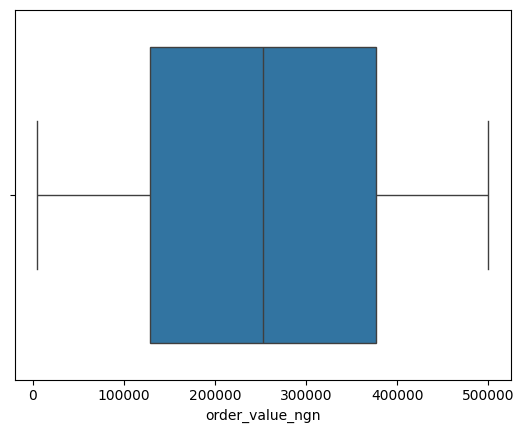

In [11]:
df.drop_duplicates(inplace=True)
sns.boxplot(x=df['order_value_ngn'])  # Spot extreme order values

Basic Analysis and Visualizations

<Axes: xlabel='delivery_city'>

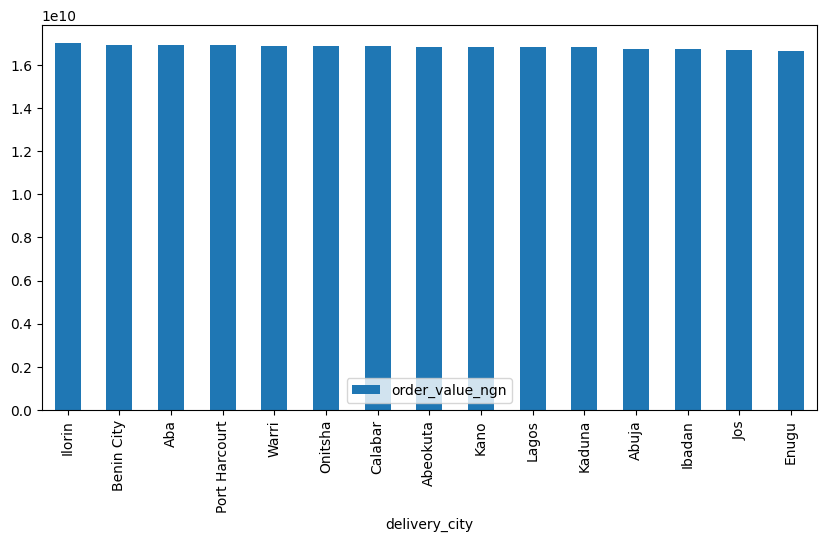

In [13]:
# Sales by city
city_sales = df.groupby('delivery_city')['order_value_ngn'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', figsize=(10,5))

# Payment method success rate
payment_success = df.groupby('payment_method')['order_status'].apply(lambda x: (x=='success').mean())
sns.barplot(x=payment_success.index, y=payment_success.values)

# Delivery days distribution
# sns.histplot(df['delivery_days'].dropna(), bins=30)

Optional Interactive Plotly Chart

In [14]:
fig = px.bar(city_sales, x=city_sales.index, y=city_sales.values, title="Total Sales by City")
fig.show()